<a href="https://colab.research.google.com/github/tomfox1/DS-Unit-2-Sprint-2-Regression/blob/master/Copy_of_Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [0]:
url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv"
df = pd.read_csv(url)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
#log-linear plot 
feature = ["LotArea"]

target = ["SalePrice"]

X = df[feature] 
y = np.log(df[target])

model = LinearRegression()
model.fit(X, y)

y_pred = np.exp(model.predict(X))

In [0]:
model.intercept_, model.coef_

(array([11.91574877]), array([[1.02979845e-05]]))

In [0]:
(mean_squared_error(y, y_pred))**(1/2), model.score(X, y)

(173248.7226256782, 0.06621352700042493)

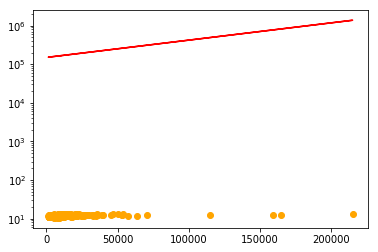

In [0]:
#plotting our log-linear regression 
#Our red line showing y_pred has been transformed to an exponential function 
#our target is likely not best represented by a log transformation 
fig, ax = plt.subplots()
ax.scatter(X, y, color="orange")
ax.plot(X, y_pred, color="red");
plt.yscale("log")

In [0]:
#R_squared score is terrible 
#statsmodel used here to show summary, won't be used throughout notebook 
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     103.4
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           1.64e-23
Time:                        21:05:53   Log-Likelihood:                -681.35
No. Observations:                1460   AIC:                             1367.
Df Residuals:                    1458   BIC:                             1377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9157      0.015    811.561      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
#R_squared score is still terrible, althout a little better 
df["LotArea_squared"] = df["LotArea"]**2

feature = ["LotArea_squared"]
target = ["SalePrice"]

X1 = df[feature]
y1 = df[target]

model = LinearRegression()
model.fit(X1, y1)

y_pred1 = model.predict(X1)
model.score(X1, y1)

0.013103025358683351

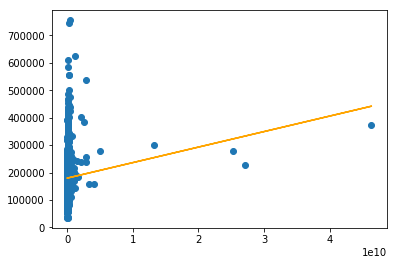

In [0]:
#plotting first polynomial feature 
fig, ax = plt.subplots()
ax.scatter(X1, y1)
ax.plot(X1, y_pred1, color="orange");

In [0]:
#cleaning NaNs in order to fit our regression model 
mean_Lot = np.mean(df["LotFrontage"])

df["LotFrontage"].isna().sum()
Lot = df.fillna(mean_Lot)

In [0]:
#creating second polynomial feature 
#R_squared value improved slightly 
df["LotFrontage_squared"] = df["LotFrontage"]**2

feature = ["LotFrontage_squared"]
target = ["SalePrice"]

X2 = Lot[feature]
y2 = df[target]

model = LinearRegression()
model.fit(X2, y2)

y_pred2 = model.predict(X2)
model.score(X2, y2)

0.05067268780446221

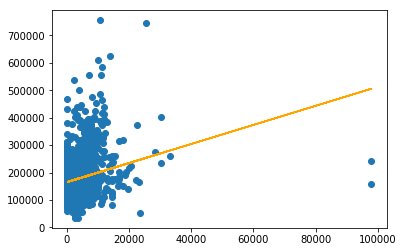

In [0]:
#plotting second polynomial feature 
fig, ax = plt.subplots()
ax.scatter(X2, y2)
ax.plot(X1, y_pred2, color="orange");

In [0]:
#interaction feature 

features = ["LotArea", "LotFrontage"]

target = ["SalePrice"]

Xi = Lot[features] 
yi = df[target]

#price = B0*LotArea + B1*LotFrontage + B2(LotArea*LotFrontage)



In [0]:
a = pd.DataFrame(df_poly)
a = a.drop(columns=[0, 4, 5])

In [0]:
#it was interesting to test out the function below
#it creates factor variables out of the indendent variables 
#since we only wanted B1*B2 I dropped all the other default ones 
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#df_poly = poly.fit_transform(Xi)

model = LinearRegression()
model.fit(a[[3]], yi)

model.score(a[[3]], yi)

0.013103025358683351

In [0]:
#our r-squared result is higher for this case, in which we don't use a interactive factor
features = ["LotArea", "LotFrontage"]

target = ["SalePrice"]

Xii = Lot[features] 
yii = df[target]

model = LinearRegression()
model.fit(Xii, yii)

model.score(Xii, yii)


0.14080753391572376

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data